In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("BMI.csv")

In [3]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [4]:
df.count()

Gender    500
Height    500
Weight    500
Index     500
dtype: int64

In [5]:
df.shape

(500, 4)

In [6]:
print(df.head(n=10).to_string(index=False))

 Gender  Height  Weight  Index
   Male     174      96      4
   Male     189      87      2
 Female     185     110      4
 Female     195     104      3
   Male     149      61      3
   Male     189     104      3
   Male     147      92      5
   Male     154     111      5
   Male     174      90      3
 Female     169     103      4


In [7]:
df[10:11]

,Gender,Height,Weight,Index
10,Male,195,81,2


In [8]:
dummies=pd.get_dummies(df['Gender'])
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
495,1,0
496,1,0
497,1,0
498,0,1


In [9]:
merged=pd.concat([df,dummies],axis='columns')
merged

,Gender,Height,Weight,Index,Female,Male
0,Male,174,96,4,0,1
1,Male,189,87,2,0,1
2,Female,185,110,4,1,0
3,Female,195,104,3,1,0
4,Male,149,61,3,0,1
...,...,...,...,...,...,...
495,Female,150,153,5,1,0
496,Female,184,121,4,1,0
497,Female,141,136,5,1,0
498,Male,150,95,5,0,1


In [10]:
final=merged.drop(['Gender','Female'],axis='columns')
final

,Height,Weight,Index,Male
0,174,96,4,1
1,189,87,2,1
2,185,110,4,0
3,195,104,3,0
4,149,61,3,1
...,...,...,...,...
495,150,153,5,0
496,184,121,4,0
497,141,136,5,0
498,150,95,5,1


In [11]:
X=final.drop(['Index'],axis="columns")
Y=final['Index']

In [12]:
X

,Height,Weight,Male
0,174,96,1
1,189,87,1
2,185,110,0
3,195,104,0
4,149,61,1
...,...,...,...
495,150,153,0
496,184,121,0
497,141,136,0
498,150,95,1


In [13]:
Y

0      4
1      2
2      4
3      3
4      3
      ..
495    5
496    4
497    5
498    5
499    5
Name: Index, Length: 500, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [16]:
print(len(x_train),len(x_test))

400 100


In [17]:
print(len(y_train),len(y_test))

400 100


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model= LogisticRegression()

In [20]:
model.fit(x_train,y_train)

C:\Users\shavej shaikh\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [21]:
model.score(x_test,y_test)

0.75

In [22]:
predicted=model.predict(x_test)

In [23]:
predicted

array([3, 5, 5, 4, 5, 2, 5, 5, 3, 5, 5, 5, 1, 5, 5, 3, 4, 4, 3, 4, 4, 4,
       4, 4, 5, 5, 2, 4, 4, 4, 4, 5, 3, 4, 3, 5, 3, 1, 3, 5, 3, 5, 5, 4,
       5, 4, 2, 3, 2, 5, 4, 5, 2, 4, 5, 3, 5, 4, 4, 3, 4, 5, 5, 5, 4, 2,
       5, 5, 4, 4, 3, 5, 5, 2, 4, 5, 3, 3, 2, 4, 4, 0, 2, 4, 3, 4, 4, 5,
       5, 4, 4, 0, 2, 5, 2, 4, 4, 5, 5, 5], dtype=int64)

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
con= confusion_matrix(y_test,predicted)

In [26]:
import seaborn as sn

Text(69.0, 0.5, 'Truth')

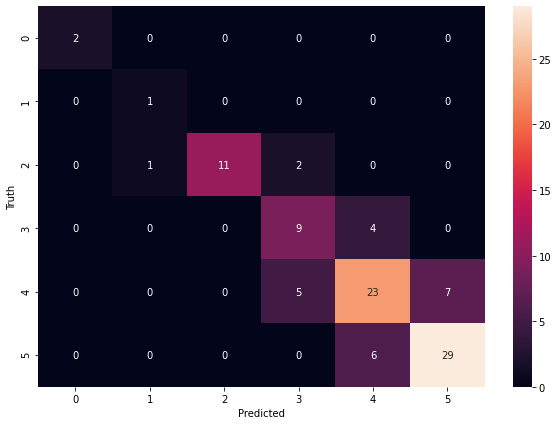

In [28]:
plt.figure(figsize=(10,7))
sn.heatmap(con,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')